In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [35]:
data=load_iris()
X=pd.DataFrame(data.data,columns=data.feature_names)
X_df=pd.DataFrame(data.data,columns=data.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [36]:
cat_cols=X.select_dtypes(include='object').columns
le=LabelEncoder()
for cols in cat_cols:
    X[cols]=le.fit_transform(X[cols])

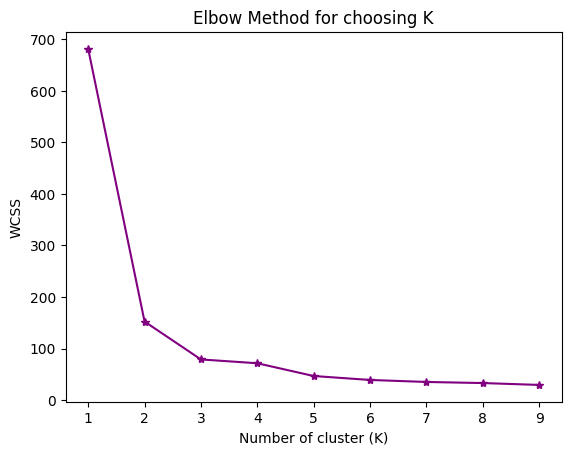

In [37]:
wcss=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,10),wcss, marker='*', color='purple')

plt.xlabel("Number of cluster (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for choosing K")
plt.show()

In [38]:
K = 3   # 🔁 SET K AFTER ELBOW METHOD

km = KMeans(
    n_clusters=K,random_state=42
)

km.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [39]:
labels = km.labels_              # Cluster assignment
centroids = km.cluster_centers_  # Final centroids

print("Cluster Labels:\n", labels)
print("Centroids:\n", centroids)

Cluster Labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
Centroids:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


In [40]:
silhouette_score(X, labels)

0.5511916046195919

In [41]:
# X["Cluster"] = labels
# X

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)
centroids_pca = pca.transform(centroids)
np.mean(pca.explained_variance_ratio_)

/opt/homebrew/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


np.float64(0.48884260315939726)

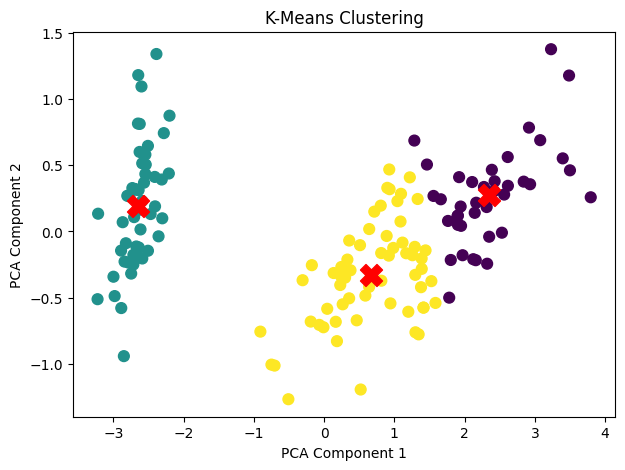

In [43]:

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=labels, s=60)
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    marker='X',
    s=250,
    c='red',
    label='Centroids'
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering")
plt.show()

In [44]:
X_df['Cluster'] = labels
print(X_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Cluster  
0          1